In [ ]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

## 1D Gradient Descent

### What is 1D Gradient Descent?
We aim to minimize a differentiable function $f(x)$ by iteratively moving opposite to its gradient:
- Update rule (constant step size $\alpha$):
  
  $$x_{k+1} = x_k - \alpha \, f'(x_k).$$
  
- Intuition: $f'(x_k)$ tells the local slope; moving against it reduces $f$, if $\alpha$ is chosen appropriately.

For a quadratic $f(x) = ax^2 + bx + c$ with $a > 0$ (convex), gradient descent converges linearly for any $\alpha \in (0, 2/L)$, where $L$ is the Lipschitz constant of $f'$ (for this 1D quadratic, $L = 2a$).

In our example $f(x) = (x - 2)^2 + 1$:
- $f'(x) = 2(x - 2)$.
- The unique minimizer is $x^* = 2$.
- Here $a = 1$, so $L = 2$. Safe constant step sizes satisfy $0 < \alpha < 1$. Larger $\alpha$ can overshoot or diverge.

1) Let us consider the function
$$ f(x) = (x-2)^2 + 1 $$
First plot it.

In [1]:
# Problem setup: f and its derivative for 1D example
def f(x):
    x = np.asarray(x)
    return (x - 2.0) ** 2 + 1.0

def df(x):
    x = np.asarray(x)
    return 2.0 * (x - 2.0)

In [2]:
def gradient_descent(x0, grad, alpha, n_iters=50, tol=None):
    """
    Basic 1D gradient descent.
    - x0: initial point (float)
    - grad: function g(x) = f'(x)
    - alpha: float or callable k -> alpha_k
    - n_iters: number of iterations
    - tol: optional tolerance on parameter change to early stop
    Returns:
      xs: np.array of iterates (length n_iters+1)
      fxs: np.array of f at those iterates
      alphas: np.array of step sizes used (length n_iters)
    """
    x = float(x0)
    xs = [x]
    alphas = []
    for k in range(n_iters):
        a = alpha(k) if callable(alpha) else float(alpha)
        alphas.append(a)
        g = float(grad(x))
        x_next = x - a * g
        xs.append(x_next)
        if tol is not None and abs(x_next - x) < tol:
            break
        x = x_next
    xs = np.array(xs)
    fxs = f(xs)
    return xs, fxs, np.array(alphas)

In [3]:
def plot_function_and_points(xs, f, x_range=None, title="Gradient Descent Trajectory"):
    xs = np.asarray(xs)
    # choose a reasonable plotting window
    if x_range is None:
        pad = 1.0
        xmin = float(np.min(xs)) if len(xs) else 0.0
        xmax = float(np.max(xs)) if len(xs) else 0.0
        xmin = min(xmin, 2.0) - pad
        xmax = max(xmax, 2.0) + pad
        # keep within a sane default
        xmin = max(xmin, -10)
        xmax = min(xmax, 10)
        x_range = (xmin, xmax)
    grid = np.linspace(x_range[0], x_range[1], 400)
    plt.figure(figsize=(10, 4))
    # Left: curve with points
    plt.subplot(1, 2, 1)
    plt.plot(grid, f(grid), label='f(x)')
    if len(xs):
        plt.plot(xs, f(xs), 'o-r', label='iterates')
    plt.scatter([2.0], [f(2.0)], c='green', s=80, marker='*', label='minimum at x=2')
    plt.axvline(2.0, color='gray', ls='--', alpha=0.4)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.legend()
    # Right: x_k vs k
    plt.subplot(1, 2, 2)
    if len(xs):
        plt.plot(range(len(xs)), xs, 'o-')
    plt.xlabel('iteration k')
    plt.ylabel('x_k')
    plt.title('x_k over iterations')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

def alpha_schedule(lmbda=0.1):
    """Return a diminishing step-size schedule alpha_k = lambda / (k+1)."""
    return lambda k: lmbda / (k + 1)

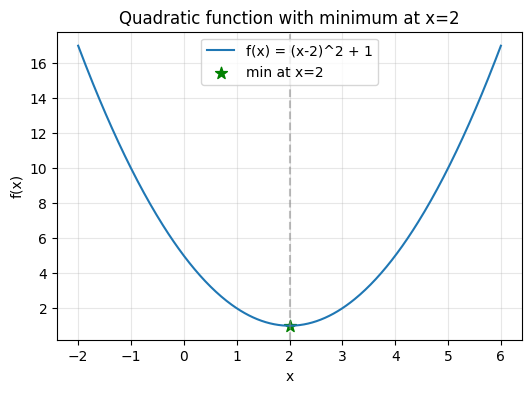

In [19]:
# 1) Plot f(x) = (x-2)^2 + 1
x_grid = np.linspace(-2, 6, 400)
plt.figure(figsize=(6,4))
plt.plot(x_grid, f(x_grid), label='f(x) = (x-2)^2 + 1')
plt.scatter([2.0], [f(2.0)], c='green', s=80, marker='*', label='min at x=2')
plt.axvline(2.0, color='gray', ls='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Quadratic function with minimum at x=2')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

2) If we start at $x=4$, which way should we move and why?

In [20]:
# 2) Direction of movement from x=4
x0 = 4.0
g0 = df(x0)
direction = -np.sign(g0)  # -grad direction
print(f"f'(4) = {g0}")
if g0 > 0:
    print("Gradient is positive -> move left (decrease x) to go downhill.")
elif g0 < 0:
    print("Gradient is negative -> move right (increase x) to go downhill.")
else:
    print("Gradient is zero -> already at a stationary point.")

f'(4) = 4.0
Gradient is positive -> move left (decrease x) to go downhill.


3) If the step size is constant $\alpha = 1.1$, what does the update rule look like?

$$ x_{n+1} = x_n - \alpha \, f'(x_n) $$

In [21]:
# 3) Update rule with constant step size alpha = 1.1
alpha = 1.1
print("Update: x_{n+1} = x_n - alpha * f'(x_n)")
print("For our f'(x) = 2(x-2):")
print(f"x_(n+1) = x_n - {alpha} * 2 * (x_n - 2) = x_n - {2*alpha} (x_n - 2)")

Update: x_{n+1} = x_n - alpha * f'(x_n)
For our f'(x) = 2(x-2):
x_(n+1) = x_n - 1.1 * 2 * (x_n - 2) = x_n - 2.2 (x_n - 2)


4) Try gradient descent with step size $\alpha=1.1$ for 10 iterations. Print and plot the iterates. What behavior do you observe and why?

Hint: for this $f$, $f'(x) = 2(x-2)$, and stability requires $0 < \alpha < 1$.

Iter	x_k	f(x_k)
0	4.000000	5.000000
1	-0.400000	6.760000
2	4.880000	9.294400
3	-1.456000	12.943936
4	6.147200	18.199268
5	-2.976640	25.766946
6	7.971968	36.664402
7	-5.166362	52.356739
8	10.599634	74.953704
9	-8.319561	107.493333
10	14.383473	154.350400


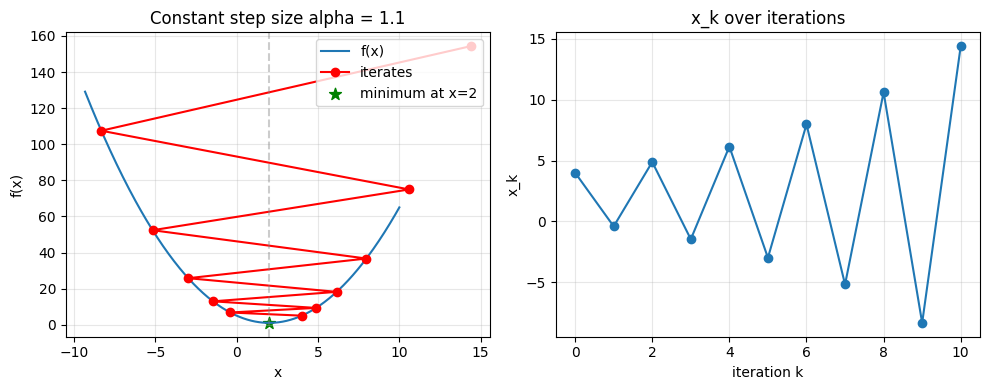

In [22]:
# 4) Run 10 iterations with alpha = 1.1 (expect divergence/oscillation for this quadratic)
alpha = 1.1
x0 = 4.0
xs, fxs, alphas = gradient_descent(x0, df, alpha, n_iters=10)
print("Iter\tx_k\tf(x_k)")
for k, (xk, fxk) in enumerate(zip(xs, fxs)):
    print(f"{k}\t{xk:.6f}\t{fxk:.6f}")
plot_function_and_points(xs, f, title=f"Constant step size alpha = {alpha}")
plt.show()

5) Now try step size $\alpha=0.01$ for 100 iterations. Print and plot the iterates. Can you explain the behavior?

Note: small $\alpha$ converges safely but slowly.

Iter	x_k	f(x_k)
0	4.000000	5.000000
10	3.634146	3.670432
20	3.335216	2.782802
30	3.090969	2.190213
40	2.891401	1.794595
50	2.728339	1.530478
60	2.595106	1.354151
70	2.486245	1.236434
80	2.397298	1.157845
90	2.324621	1.105379
100	2.265239	1.070352
Final: k=100, x=2.265239, f(x)=1.070352


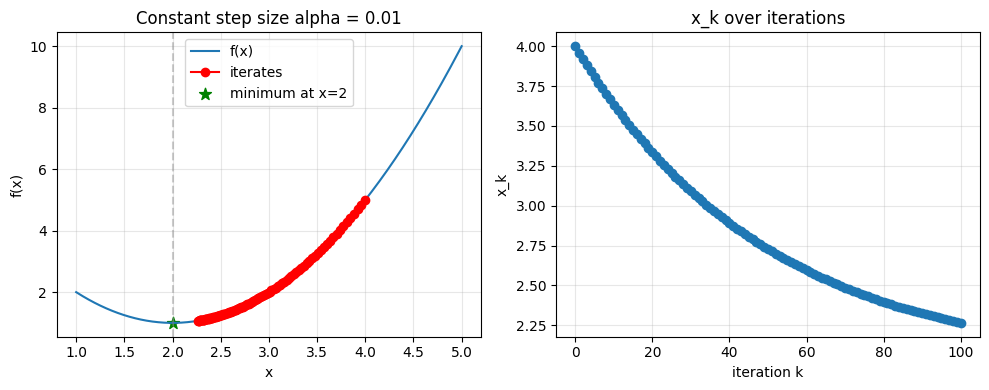

In [23]:
# 5) Run 100 iterations with alpha = 0.01 (should converge)
alpha = 0.01
x0 = 4.0
xs, fxs, alphas = gradient_descent(x0, df, alpha, n_iters=100)
print("Iter\tx_k\tf(x_k)")
for k in range(0, len(xs), 10):
    print(f"{k}\t{xs[k]:.6f}\t{fxs[k]:.6f}")
print(f"Final: k={len(xs)-1}, x={xs[-1]:.6f}, f(x)={fxs[-1]:.6f}")
plot_function_and_points(xs, f, title=f"Constant step size alpha = {alpha}")
plt.show()

6) When do we prefer a smaller step size, and when a larger one? Relate your answer to curvature and stability on this function.

Recall: for a convex quadratic in 1D with Lipschitz constant $L$ of $f'$, constant-$\alpha$ gradient descent converges if $0 < \alpha < 2/L$. Here, $L=2$.

In [24]:
# 6) Explanation: when small vs big step sizes?
from textwrap import dedent
print(dedent("""\
Guidance on choosing step size alpha:
- Small alpha: safer, steady decrease but slow progress; good when curvature is high or you're near the minimum.
- Large alpha: faster progress initially, but risks overshooting or divergence; unstable when alpha >= 1 for this problem (since L=2 -> need alpha < 1).
- Theory for convex quadratics: require 0 < alpha < 2/L. For f(x)=(x-2)^2+1, L=2, so 0 < alpha < 1.
- Practical: try a few values, or use backtracking/line search to pick alpha that reduces f.
"""))

Guidance on choosing step size alpha:
- Small alpha: safer, steady decrease but slow progress; good when curvature is high or you're near the minimum.
- Large alpha: faster progress initially, but risks overshooting or divergence; unstable when alpha >= 1 for this problem (since L=2 -> need alpha < 1).
- Theory for convex quadratics: require 0 < alpha < 2/L. For f(x)=(x-2)^2+1, L=2, so 0 < alpha < 1.
- Practical: try a few values, or use backtracking/line search to pick alpha that reduces f.



7) What function kind of does that?

### Step-size strategies (learning rates)
- Constant $\alpha$: simple and effective when a safe range is known.
- Diminishing $\alpha_k$: e.g., $\alpha_k = \lambda/(k+1)$. Guarantees convergence for convex smooth problems under mild conditions, often slower but stable.
- Line search: choose $\alpha_k$ each step to sufficiently decrease $f$ (e.g., backtracking). More robust, extra function/gradient evaluations.

In [25]:
# 7) Define a diminishing learning rate function alpha_k = lambda/(k+1) and preview a few values
lmbda = 0.1
a = alpha_schedule(lmbda)
vals = [a(k) for k in range(10)]
print("First 10 step sizes:", np.round(vals, 4))

First 10 step sizes: [0.1    0.05   0.0333 0.025  0.02   0.0167 0.0143 0.0125 0.0111 0.01  ]


8) Using that diminishing step-size function, what is the update rule? Write it explicitly for this $f'(x)$.

$$ x_{k+1} = x_k - \alpha_k \, f'(x_k), \quad \text{with } \alpha_k = \frac{\lambda}{k+1}. $$

In [26]:
# 8) Update rule with diminishing alpha_k = lambda/(k+1)
from textwrap import dedent
print(dedent("""\
Update: x_{k+1} = x_k - alpha_k * f'(x_k), where alpha_k = lambda / (k+1).
For f'(x) = 2(x-2):
x_{k+1} = x_k - (lambda/(k+1)) * 2 (x_k - 2).
"""))

Update: x_{k+1} = x_k - alpha_k * f'(x_k), where alpha_k = lambda / (k+1).
For f'(x) = 2(x-2):
x_{k+1} = x_k - (lambda/(k+1)) * 2 (x_k - 2).



9) Try the diminishing schedule with $\lambda=0.1$. Print and plot to see what happens.

Expect monotone decrease with smaller steps over time.

Final: k=100, x=2.683352, f(x)=1.466969


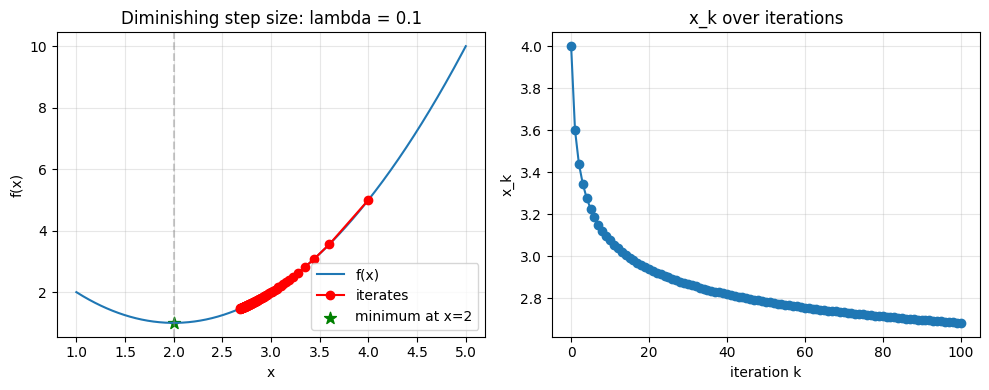

In [27]:
# 9) Run diminishing schedule with lambda = 0.1
x0 = 4.0
lmbda = 0.1
alpha_k = alpha_schedule(lmbda)
xs, fxs, _ = gradient_descent(x0, df, alpha_k, n_iters=100)
print(f"Final: k={len(xs)-1}, x={xs[-1]:.6f}, f(x)={fxs[-1]:.6f}")
plot_function_and_points(xs, f, title=f"Diminishing step size: lambda = {lmbda}")
plt.show()

10) Try the diminishing schedule with $\lambda = 1.1$ for 4 iterations. What do you observe?

Compare the early large steps to the later smaller steps.

Iter	x_k	f(x_k)	alpha_k
0	4.000000	5.000000	1.1000
1	-0.400000	6.760000	0.5500
2	2.240000	1.057600	0.3667
3	2.064000	1.004096	0.2750
4	2.028800	1.000829	0.2750


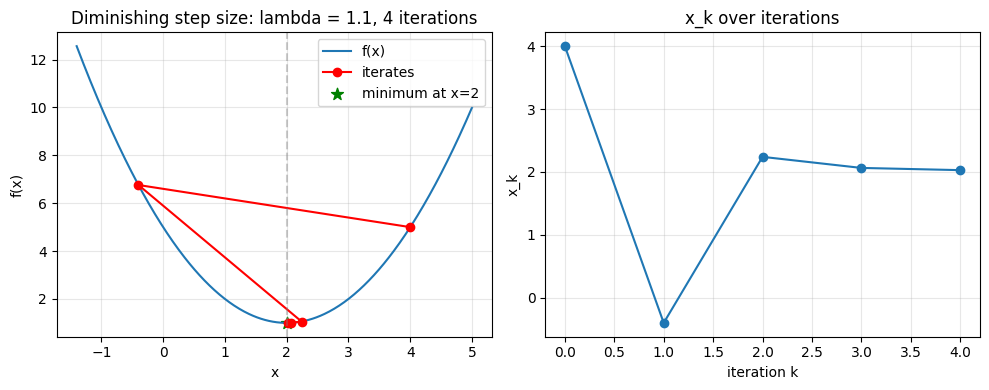

In [28]:
# 10) Run diminishing schedule with lambda = 1.1 for 4 iterations
x0 = 4.0
lmbda = 1.1
alpha_k = alpha_schedule(lmbda)
n_iters = 4
xs, fxs, _ = gradient_descent(x0, df, alpha_k, n_iters=n_iters)
print("Iter\tx_k\tf(x_k)\talpha_k")
for k, xk in enumerate(xs):
    ak = alpha_k(k) if k < n_iters else alpha_k(n_iters-1)
    print(f"{k}\t{xk:.6f}\t{f(xk):.6f}\t{ak:.4f}")
plot_function_and_points(xs, f, title=f"Diminishing step size: lambda = {lmbda}, {n_iters} iterations")
plt.show()

---
### Summary and takeaways
- For $f(x) = (x-2)^2 + 1$, the exact minimizer is $x^* = 2$.
- Gradient descent with constant step size converges if $0 < \alpha < 1$ (here $L = 2$ so $2/L = 1$).
- Too-large $\alpha$ (e.g., 1.1) overshoots and diverges; small $\alpha$ (e.g., 0.01) converges slowly but safely.
- Diminishing step sizes ($\alpha_k = \lambda/(k+1)$) offer a robust alternative when $L$ is unknown, usually with slower progress.
- To maximize $g(x)$, use gradient ascent $x_{k+1} = x_k + \alpha \nabla g(x_k)$, or equivalently minimize $-g$ with gradient descent.
- Visualizing iterates on the curve and over iterations helps build intuition about stability and convergence speed.

### Maximization via Gradient Methods
To maximize a differentiable function $g(x)$, you have two equivalent choices:
- Gradient ascent:

  $$ x_{k+1} = x_k + \alpha \, \nabla g(x_k). $$

- Gradient descent on the negative function:

  $$ x_{k+1} = x_k - \alpha \, \nabla(-g)(x_k) = x_k + \alpha \, \nabla g(x_k). $$

Both updates are identical. For global guarantees, assume $g$ is concave (so $-g$ is convex). Step-size guidance mirrors minimization and depends on the Lipschitz constant of $\nabla g$ (equivalently $\nabla(-g)$).

Final (maximize g): x=0.999991, g(x)=3.000000


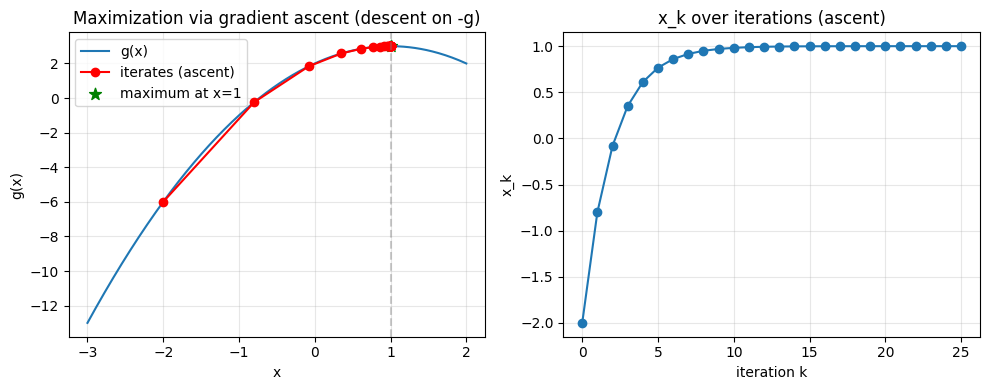

In [29]:
# Demo: Maximizing a concave function by descending on its negative
# Let g(x) = -(x-1)^2 + 3, which is concave with maximum at x=1.
def g(x):
    x = np.asarray(x)
    return -(x - 1.0) ** 2 + 3.0

def dg(x):
    x = np.asarray(x)
    return -2.0 * (x - 1.0)

x0 = -2.0
alpha = 0.2  # 0 < alpha < 1 is safe here because L for -g is 2
# Gradient ascent on g is equivalent to gradient descent on -g:
def minus_g_grad(x):
    # gradient of -g = -dg
    return -dg(x)

xs_g, fxs_g, _ = gradient_descent(x0, minus_g_grad, alpha, n_iters=25)
print(f"Final (maximize g): x={xs_g[-1]:.6f}, g(x)={g(xs_g[-1]):.6f}")

# Plot g and ascent trajectory (via descent on -g)
def plot_g_and_points(xs):
    xs = np.asarray(xs)
    pad = 1.0
    xmin = min(xs.min(), 1.0) - pad
    xmax = max(xs.max(), 1.0) + pad
    grid = np.linspace(xmin, xmax, 400)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(grid, g(grid), label='g(x)')
    plt.plot(xs, g(xs), 'o-r', label='iterates (ascent)')
    plt.scatter([1.0], [g(1.0)], c='green', s=80, marker='*', label='maximum at x=1')
    plt.axvline(1.0, color='gray', ls='--', alpha=0.4)
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.title('Maximization via gradient ascent (descent on -g)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(range(len(xs)), xs, 'o-')
    plt.xlabel('iteration k')
    plt.ylabel('x_k')
    plt.title('x_k over iterations (ascent)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
plot_g_and_points(xs_g)
plt.show()